## **Praktikum 3: Pembuatan Dataset Sintesis**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [6]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Tentukan pusat cluster
centers = [[1, 1], [-1, -1], [1, -1]]

# Generate data
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# Normalisasi / scaling
X = StandardScaler().fit_transform(X)

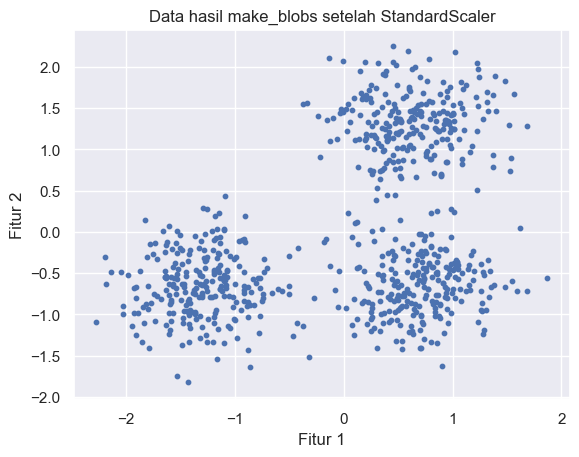

In [7]:
# Visualisasi
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Data hasil make_blobs setelah StandardScaler")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()

### **Compute DBSCAN**

In [8]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


### **Evaluasi Kualitas Klasterisasi**

In [9]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")

print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")

print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


### **Visualisasi Hasil Klasterisasi**

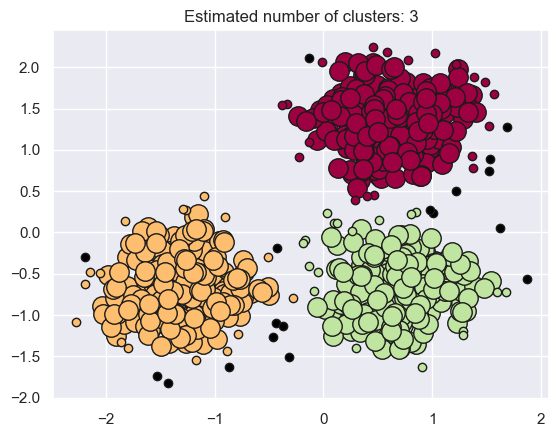

In [10]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()